In [2]:
import pandas as pd

df = pd.read_csv("students.txt",header=None, names = ["StLastName",
                                                     "StFirstName",
                                                     "Grade",
                                                     "Classroom",
                                                     "Bus",
                                                     "GPA",
                                                     "TLastName",
                                                     "TFirstName"])

In [3]:
list_df = pd.read_csv("https://s3-us-west-1.amazonaws.com/csc365-spring2019/list.txt",
           header = None,
           names = ["StLastName",
                    "StFirstName",
                    "Grade",
                    "Classroom",                    
                    "Bus",
                    "GPA"])

teachers_df = pd.read_csv("https://s3-us-west-1.amazonaws.com/csc365-spring2019/teachers.txt",
           header = None,
           names = ["TLastName",
                    "TFirstName",
                    "Classroom"])


In [4]:
df = list_df.merge(teachers_df)

In [5]:
print(df[df["Classroom"] == 107][["TLastName","TFirstName"]].drop_duplicates().values)

[['FAFARD' ' ROCIO']]


In [6]:
def lastname_query(df, lastname, bus = False):
    if type(lastname) != str:
        print("")
        return
    if bus:
        filt_df = df[df["StLastName"] == lastname][["Bus"]]
        for row in filt_df.values:
            print(row)
    else:    
        filt_df = df[df["StLastName"] == lastname][["StLastName",
                                                "Grade",
                                                "Classroom",
                                                "TLastName",
                                                "TFirstName"]]
        for row in filt_df.values:
            print(row)
    

In [7]:
def teacher_query(df, teacher):
    if type(teacher) != str:
        print("")
        return
    students = (list(df[df["TLastName"] == teacher]
                     [["StLastName","StFirstName"]].values))
    for student in students:
        print(student[0],student[1])

In [8]:
def bus_query(df, bus_route):
    try:
        bus_route = int(bus_route)
    except:
        print("")
        return
    students = (list(df[df["Bus"] == bus_route]
                     [["StLastName","StFirstName","Grade"]].values))
    for student in students:
        print(student[0],student[1],student[2])    

In [9]:
def enrollment_query(df):
    for i in list(zip(df["Classroom"].value_counts().sort_index().index,
                      df["Classroom"].value_counts().sort_index().values)):
        print(i[0],i[1])

In [10]:
def grade_query(df, grade, find_teach = False):
    try:
        grade = int(grade)
    except:
        print("")
        return
    if find_teach:
        teachers = (list(df[df["Grade"] == grade]
                         [["TLastName","TFirstName"]].values))
        print(teachers)
    else:
        students = (list(df[df["Grade"] == grade]
                         [["StLastName","StFirstName"]].values))
        for student in students:
            print(student[0],student[1])

In [11]:
def avg_query(df, grade):
    try:
        grade = int(grade)
    except:
        print("")
        return
    print(df[df["Grade"] == grade]["GPA"].mean())

In [12]:
def hi_lo_query(df, grade, lo = False):
    try:
        grade = int(grade)
    except:
        print("")
        return
    if lo:
        want_student = df[df["Grade"] == grade]["GPA"] .idxmin()
    else:
        want_student = df[df["Grade"] == grade]["GPA"] .idxmax()
    return print(df.iloc[want_student][["StLastName",
                                "StFirstName",
                                "GPA",
                                "TLastName",
                                "TFirstName",
                                "Bus"]].values)

In [13]:
print(df[df["Classroom"] == 107][["StLastName","StFirstName"]].values)

[['COOKUS' ' XUAN']
 ['ELHADDAD' ' SHANTE']
 ['SWEDLUND' ' SHARRI']
 ['CIGANEK' ' MANIE']
 ['COVINGTON' ' TOMAS']
 ['EARLY' ' TORY']
 ['LINHART' ' LELA']]


In [14]:
def classroom_query(df, classroom_num, find_teach):
    if find_teach:
        print(df[df["Classroom"] == 107][["TLastName","TFirstName"]].values)
    else:
        print(df[df["Classroom"] == 107][["StLastName","StFirstName"]].values)

In [15]:
def info_query(df):
    for i in range(7):
        num_students = len(df[df["Grade"] == i])
        print("{0}: {1}".format(i,num_students))

In [16]:
import pandas as pd

def main():
    try:
        df = pd.read_csv("students.txt",header=None, names = ["StLastName",
                                                     "StFirstName",
                                                     "Grade",
                                                     "Classroom",
                                                     "Bus",
                                                     "GPA",
                                                     "TLastName",
                                                     "TFirstName"])
    except:
        print("File not Found")
        return
    print("Instruction Prompt: \n"
           "Commands: \n"
           "- S[tudent]: <lastname> [B[us]] \n"
           "- T[eacher]: <lastname> \n"
           "- G[rade]: <number> [H[igh]]|L[ow]] \n"
           "- A[verage]: <number> \n"
           "- I[nfo] \n"
           "- Q[uit] \n"
         "Note: The text in arguments is optional while the rest is not. \n")
    command = [[" "]]
    while command[0][0] != "Q":
        commands = input("Type in one of these commands! \n \n")
        print("\n")
        if ":" in commands:
            command = commands.split(":")
            arguments = command[1].split(" ")
            arguments = [i for i in arguments if i != ""]
        else:
            command = [commands," "]
            arguments = []
        if command[0][0] == "S":
            if len(arguments) == 2:
                lastname_query(df, arguments[0], True)
            else:
                lastname_query(df, arguments[0], False)
        elif command[0][0] == "T":
            teacher_query(df, arguments[0])
        elif command[0][0] == "B":
            bus_query(df, arguments[0])
        elif command[0][0] == "G":
            if len(arguments) == 2:
                if arguments[1][0] == "H":
                    hi_lo_query(df, arguments[0], lo = False)
                elif arguments[1][0] == "L":
                    hi_lo_query(df, arguments[0], lo = True)
            else:
                grade_query(df, arguments[0])
        elif command[0][0] == "A":
            avg_query(df, arguments[0])
        elif command[0][0] == "I":
            info_query(df)
        elif command[0][0] == "Q":
            print("Quitting")   

In [20]:
main()

Instruction Prompt: 
Commands: 
- S[tudent]: <lastname> [B[us]] 
- T[eacher]: <lastname> 
- G[rade]: <number> [H[igh]]|L[ow]] 
- A[verage]: <number> 
- I[nfo] 
- Q[uit] 
Note: The text in arguments is optional while the rest is not. 

Type in one of these commands! 
 
G: 10
Type in one of these commands! 
 
G: 6
SCHOENECKER PHUONG
RACANELLO NOEL
STERBACK PETER
FINCHMAN MATHILDA
ZAPPAVIGNA ELLIOTT
OBREIN STAN
CORONADO DIMPLE
SAENPHIMMACHA NUMBERS
BOYTER WAN
BREVO JANNETTE
CLECKLER FLOY
KRAKE VALENTIN
KEMERER ROSETTA
BEAN INGER
DEMARTINI DEWAYNE
CREMEANS RANDOLPH
FEYEREISEN WILFREDO
WERST LEON
LAMKIN TAMA
KREESE CARRIE
FRIEDSTROM REED
Type in one of these commands! 
 
Q
Quitting


In [26]:
import numpy as np
%matplotlib inline

In [44]:
print(df.pivot_table(index = "Grade",
               columns = None,
               values = "GPA",
               aggfunc = [np.var,np.mean]))

            var      mean
            GPA       GPA
Grade                    
1      0.042050  2.995000
2      0.015276  2.946154
3      0.025536  3.048889
4      0.012784  2.951333
6      0.021821  2.977143


In [41]:
df.pivot_table(index = "Grade",
               columns = None,
               values = "GPA",
               aggfunc = np.mean)

,GPA
Grade,
1,2.995000
2,2.946154
3,3.048889
4,2.951333
6,2.977143


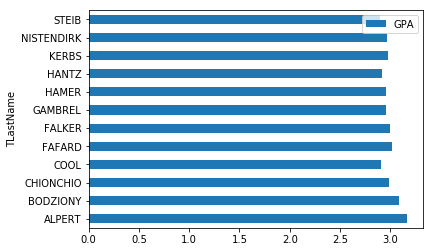

In [31]:
df.pivot_table(index = "TLastName",
               values = "GPA",
               aggfunc = np.mean).plot.barh()

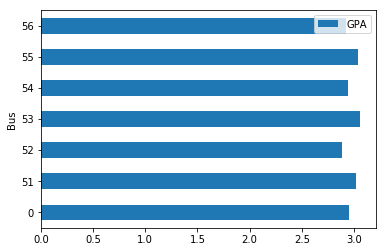

In [32]:
df.pivot_table(index = "Bus",
               values = "GPA",
               aggfunc = np.mean).plot.barh()

In [ ]:
def pivot_query(df, group):
    print(df.pivot_table(index = group,
                   columns = None,
                   values = "GPA",
                   aggfunc = [np.var,np.mean]))
    

In [50]:
df.columns = [x.upper() for x in data.columns]

Index(['StLastName', 'StFirstName', 'Grade', 'Classroom', 'Bus', 'GPA',
       'TLastName', 'TFirstName'],
      dtype='object')

p[ivot]: <group>